# 📤 import labraries and  💾 show the data 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline
df=pd.read_csv('titanic-passengers.csv')
df.head()

## Preprocissing of Data

 *  we observe that our dataframe is Rowso weshould use the "sep" to edit it 

In [4]:
df=pd.read_csv('titanic-passengers.csv',sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


* we also observe that "Age & Embarked" has some empty values and "Cabin" has has a many lessvalues

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


* so we need to fill  the NaN or empty values in "Age" cuz it s important columns

In [6]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

transfer the categorical values of  columns 'Survived' & 'Sex' to numerical values

In [7]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   
df["Sex"]=df["Sex"].map({"female": 1, "male": 0}) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S


## 📊 Exploratory Data Analysis (EDA)

show the correlation map btw columns 

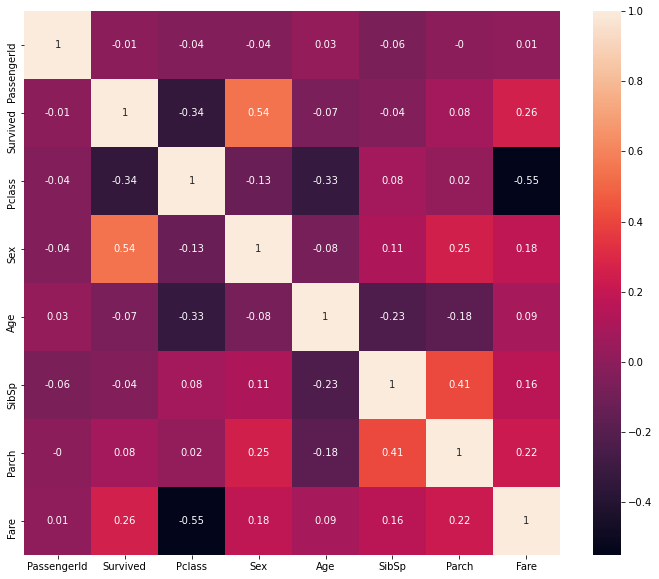

In [8]:
s,ax = plt.subplots( figsize =( 12 , 10 ) )
s = sns.heatmap(data=df.corr().round(2) ,annot=True)

## Logistics regression 

In [24]:
# declaration of the variable X & Y
x = df[['Fare','Parch','SibSp','Sex','Pclass']]
y = df['Survived']

#normalise the input values  
x = (x -np.min(x))/(np.max(x)-np.min(x)).values

# split the data to training data and testing data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

# creat our logistic  regression model and tranin it 
logreg = LogisticRegression()   
logreg.fit(x_train, y_train) 

# prdict the Y_testing & Y_training
y_pred_test  = logreg.predict(x_test) 
y_pred_train=logreg.predict(x_train)

#print the accuracy 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

# we notice that the accurcy is 0.84 and we count it a good accurcy so this model is acceptable 

Accuracy=0.84


## show the regplot for diffrent input columns 

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

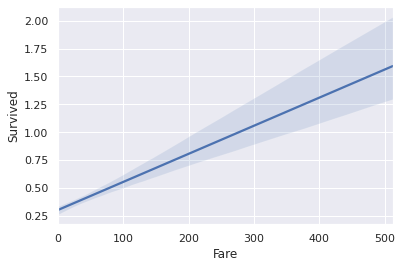

In [64]:
sns.set_theme(color_codes=True)
sns.regplot(x='Fare',y='Survived',data=df,scatter=False)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

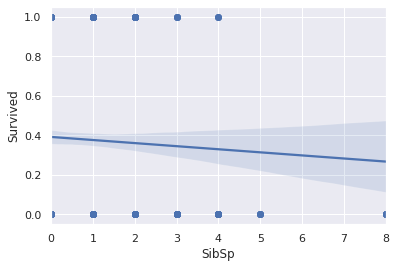

In [51]:
sns.set_theme(color_codes=True)
sns.regplot(x='SibSp',y='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

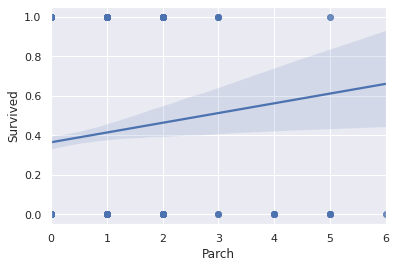

In [52]:
sns.set_theme(color_codes=True)
sns.regplot(x='Parch',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

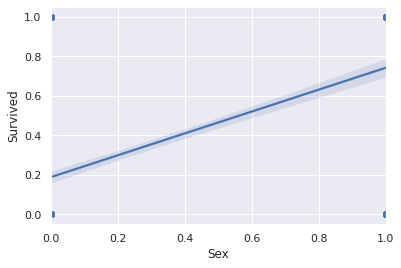

In [53]:
sns.set_theme(color_codes=True)
sns.regplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

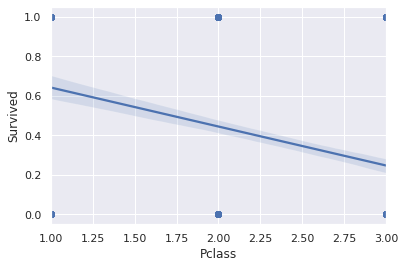

In [54]:
sns.set_theme(color_codes=True)
sns.regplot(x='Pclass',y='Survived',data=df)

## show the confiusion_matrix_test 
* we see the the TP is about 85% witch is a good classification & forthe TN 83% also so the model is effective 
* the model have 17% of FP and 15% of FN witch is a small pourcentage that does not effect 

* TP= the model predict that the passenger is Survived and it was right
* FP= the model predict that the passenger is Survived and it was Wrong
* TN= the model predict that the passenger isn t Survived and it was right
* FN= the model predict that the passenger isn t Survived and it was Wrong

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

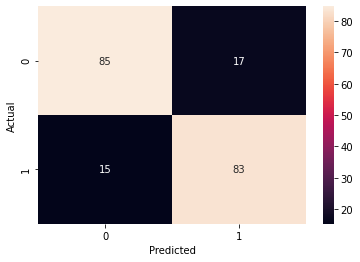

In [35]:
confusion_matrix_test = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap((confusion_matrix/np.sum(confusion_matrix_test))*100, annot=True)

* Our model has precision of 2 class btw 83% - 85%
* Out of all the Passengers that we predicted to be ‘Survived’,  we actually get 83% right
* Out of all the Passengers that we predicted to be ‘Not-Survived’,  we actually get  85% right
* Out of all the passengers that got Survived, we get 92% correct
* Out of all the passengers that got Not-Survived, we get 70% correct

In [36]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       144
           1       0.83      0.70      0.76        79

    accuracy                           0.84       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



## show the confiusion_matrix_train
* we see the the TP is about 31% witch is a good classification & for the TN 23% also so the model is effective 
* the model have 4.6% of FP and 5.6% of FN witch is a small pourcentage that does not effect 

* TP= the model predict that the passenger is Survived and it was right
* FP= the model predict that the passenger is Survived and it was Wrong
* TN= the model predict that the passenger isn t Survived and it was right
* FN= the model predict that the passenger isn t Survived and it was Wrong

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

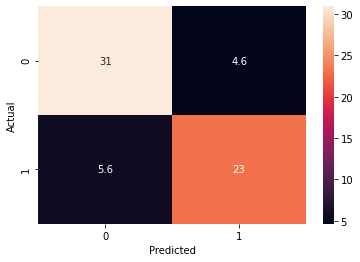

In [37]:
confusion_matrix_train = pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap((confusion_matrix/np.sum(confusion_matrix_train))*100, annot=True)

In [38]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       405
           1       0.74      0.67      0.71       263

    accuracy                           0.78       668
   macro avg       0.77      0.76      0.77       668
weighted avg       0.78      0.78      0.78       668



## What is the AUC - ROC Curve?
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

* ROC curve is used for probabilistic models which predicts the probability of one or more classes.
* ROC curve is used to select the most appropriate models based on the model performance
* ROC curve is a plot of true positive and false positive rate values which get determined based on different * decision thresholds for a particular model.
* Different ROC curves can be created based on different features, model hyper parameters etc.
* AUC or AUROC is area under ROC curve. The value of AUC characterizes the model performance. Higher the AUC * value, higher the performance of the model.
* The perfect classifier will have high value of true positive rate and low value of false positive rate.
* Any model with ROC curve above random guessing classifier line can be considered as a better model.
* Any model with ROC curve below random guessing classifier line can outrightly be rejected.

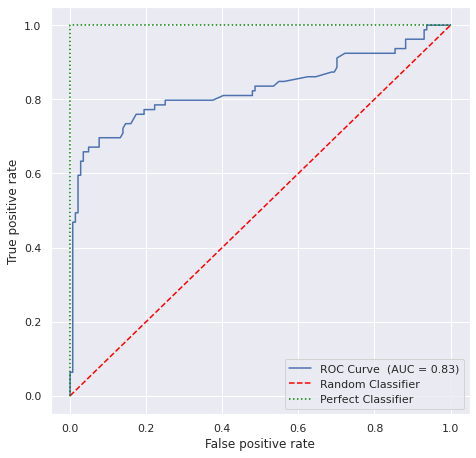

In [63]:
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
#Create training test splits using all features
#
pipeline.fit(x_train,y_train)
probs = pipeline.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plt.plot(fpr, tpr, label='ROC Curve  (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

#we see that our curve is above the red line (random gaussing) and the green line ( perferct classifier) witch can considere better model
#we see also that AUC=0.83 , it s heigher value  witch means the model is performant 
